<a href="https://colab.research.google.com/github/Vaamanikam11/Covid_Vaccine_Analysis/blob/main/Covid_Vaccine_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px                                 ##plotmaps
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/country_vaccinations.csv')


In [ ]:
df.tail

<bound method NDFrame.tail of            country  ...                                     source_website
0      Afghanistan  ...                           https://covid19.who.int/
1      Afghanistan  ...                           https://covid19.who.int/
2      Afghanistan  ...                           https://covid19.who.int/
3      Afghanistan  ...                           https://covid19.who.int/
4      Afghanistan  ...                           https://covid19.who.int/
...            ...  ...                                                ...
68839     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...
68840     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...
68841     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...
68842     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...
68843     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...

[68844 rows x 15 columns]>

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
df.mean

<bound method DataFrame.mean of            country  ...                                     source_website
0      Afghanistan  ...                           https://covid19.who.int/
1      Afghanistan  ...                           https://covid19.who.int/
2      Afghanistan  ...                           https://covid19.who.int/
3      Afghanistan  ...                           https://covid19.who.int/
4      Afghanistan  ...                           https://covid19.who.int/
...            ...  ...                                                ...
68839     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...
68840     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...
68841     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...
68842     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...
68843     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...

[68844 rows x 15 columns]>

In [ ]:
df.isnull()                               ##only shows what all is null

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,False,False,False,False,False,True,True,True,False,False,True,True,False,False,False
1,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
2,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
3,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
4,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68841,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68842,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()                                    ##.sum() gives exact number

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     32549
people_vaccinated                      34213
people_fully_vaccinated                36922
daily_vaccinations_raw                 39270
daily_vaccinations                       349
total_vaccinations_per_hundred         32549
people_vaccinated_per_hundred          34213
people_fully_vaccinated_per_hundred    36922
daily_vaccinations_per_million           349
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
 df.fillna(0, inplace = True)                               #Fill NaNs with 0 and then drop all countries with iso_code = 0. Dropping unknowns
df.drop(df.index[df['iso_code'] == 0], inplace = True)                          

In [ ]:
df.isnull().sum()                                               ##now all vals are 0 since no nulls

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68844 entries, 0 to 68843
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              68844 non-null  object 
 1   iso_code                             68844 non-null  object 
 2   date                                 68844 non-null  object 
 3   total_vaccinations                   68844 non-null  float64
 4   people_vaccinated                    68844 non-null  float64
 5   people_fully_vaccinated              68844 non-null  float64
 6   daily_vaccinations_raw               68844 non-null  float64
 7   daily_vaccinations                   68844 non-null  float64
 8   total_vaccinations_per_hundred       68844 non-null  float64
 9   people_vaccinated_per_hundred        68844 non-null  float64
 10  people_fully_vaccinated_per_hundred  68844 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
##date is in object form, convert it
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68844 entries, 0 to 68843
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              68844 non-null  object        
 1   iso_code                             68844 non-null  object        
 2   date                                 68844 non-null  datetime64[ns]
 3   total_vaccinations                   68844 non-null  float64       
 4   people_vaccinated                    68844 non-null  float64       
 5   people_fully_vaccinated              68844 non-null  float64       
 6   daily_vaccinations_raw               68844 non-null  float64       
 7   daily_vaccinations                   68844 non-null  float64       
 8   total_vaccinations_per_hundred       68844 non-null  float64       
 9   people_vaccinated_per_hundred        68844 non-null  float64       
 10  people_ful

In [ ]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [ ]:
df.drop(["people_fully_vaccinated","daily_vaccinations_raw","people_fully_vaccinated_per_hundred",
         "daily_vaccinations_per_million","people_vaccinated_per_hundred", "source_name","source_website"],axis=1, inplace=True)

In [ ]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'vaccines'],
      dtype='object')

In [ ]:
df_India = df[df["iso_code"] == 'IND'].copy()
df_India

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
28222,India,IND,2021-01-15,0.000000e+00,0.0,0.0,0.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28223,India,IND,2021-01-16,1.911810e+05,191181.0,191181.0,0.01,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28224,India,IND,2021-01-17,2.243010e+05,224301.0,112150.0,0.02,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28225,India,IND,2021-01-18,4.540490e+05,454049.0,151350.0,0.03,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28226,India,IND,2021-01-19,6.748350e+05,674835.0,168709.0,0.05,"Covaxin, Oxford/AstraZeneca, Sputnik V"
...,...,...,...,...,...,...,...,...
28575,India,IND,2022-01-03,1.464526e+09,852570971.0,6582722.0,105.10,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28576,India,IND,2022-01-04,1.472330e+09,857788520.0,6608642.0,105.66,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28577,India,IND,2022-01-05,1.482204e+09,864466425.0,6715446.0,106.37,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28578,India,IND,2022-01-06,1.491991e+09,871088714.0,7610504.0,107.07,"Covaxin, Oxford/AstraZeneca, Sputnik V"


In [ ]:
df_India.drop(df_India.index[df_India['total_vaccinations'] == 0], inplace = True)                

In [ ]:
df_India

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
28223,India,IND,2021-01-16,1.911810e+05,191181.0,191181.0,0.01,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28224,India,IND,2021-01-17,2.243010e+05,224301.0,112150.0,0.02,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28225,India,IND,2021-01-18,4.540490e+05,454049.0,151350.0,0.03,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28226,India,IND,2021-01-19,6.748350e+05,674835.0,168709.0,0.05,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28227,India,IND,2021-01-20,8.064840e+05,806484.0,161297.0,0.06,"Covaxin, Oxford/AstraZeneca, Sputnik V"
...,...,...,...,...,...,...,...,...
28575,India,IND,2022-01-03,1.464526e+09,852570971.0,6582722.0,105.10,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28576,India,IND,2022-01-04,1.472330e+09,857788520.0,6608642.0,105.66,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28577,India,IND,2022-01-05,1.482204e+09,864466425.0,6715446.0,106.37,"Covaxin, Oxford/AstraZeneca, Sputnik V"
28578,India,IND,2022-01-06,1.491991e+09,871088714.0,7610504.0,107.07,"Covaxin, Oxford/AstraZeneca, Sputnik V"


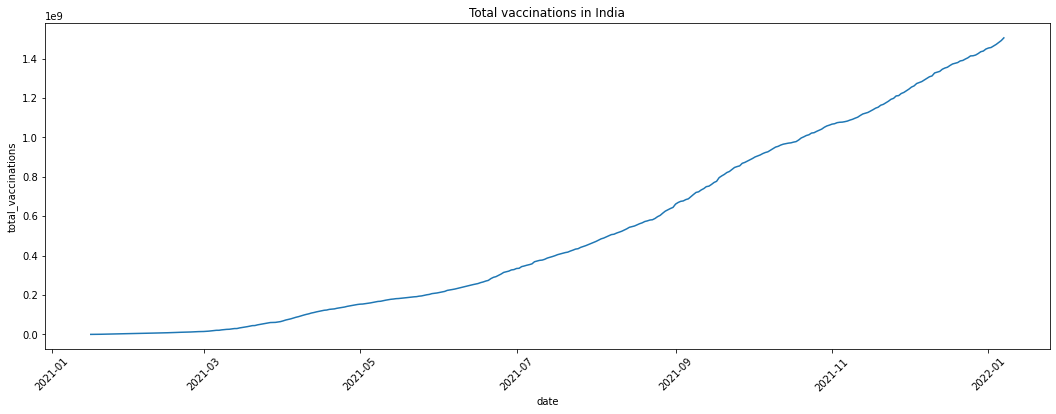

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_India, x="date", y="total_vaccinations")                        ##plotting as function date -- ttotal vaccination
plt.title("Total vaccinations in India")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in India')

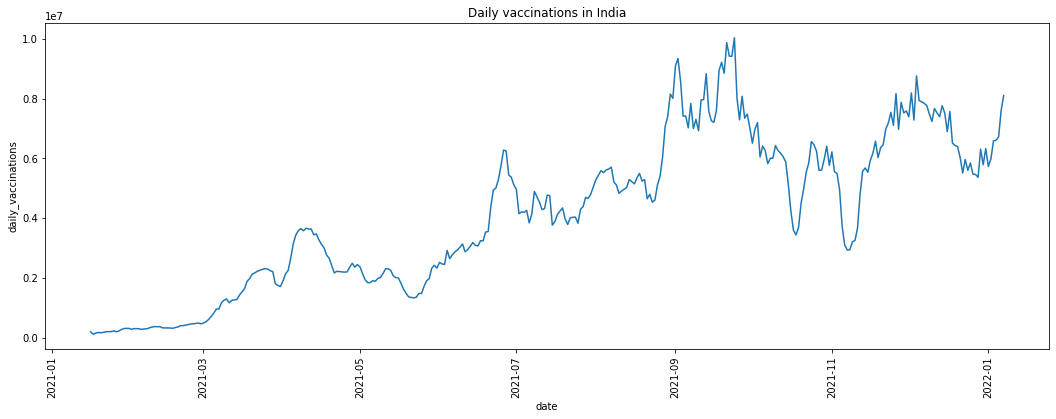

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_India, x="date", y="daily_vaccinations")                  ##daily vaccination

plt.xticks(rotation=90)
plt.title("Daily vaccinations in India")

In [ ]:
df_USA = df[df["iso_code"] == 'USA'].copy()
df_USA

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
65628,United States,USA,2020-12-13,24901.0,21027.0,0.0,0.01,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
65629,United States,USA,2020-12-14,29318.0,25305.0,4417.0,0.01,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
65630,United States,USA,2020-12-15,78472.0,72232.0,26786.0,0.02,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
65631,United States,USA,2020-12-16,237887.0,226171.0,70995.0,0.07,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
65632,United States,USA,2020-12-17,509551.0,490706.0,121162.0,0.15,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...
66014,United States,USA,2022-01-03,514470954.0,245447707.0,957490.0,154.96,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
66015,United States,USA,2022-01-04,515666535.0,245785181.0,904445.0,155.32,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
66016,United States,USA,2022-01-05,516486111.0,246015001.0,802548.0,155.56,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
66017,United States,USA,2022-01-06,516597039.0,246050320.0,620125.0,155.60,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


In [ ]:
df_USA.drop(df_USA.index[df_USA['total_vaccinations'] == 0], inplace = True)                

In [ ]:
df_USA

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
65628,United States,USA,2020-12-13,24901.0,21027.0,0.0,0.01,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
65629,United States,USA,2020-12-14,29318.0,25305.0,4417.0,0.01,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
65630,United States,USA,2020-12-15,78472.0,72232.0,26786.0,0.02,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
65631,United States,USA,2020-12-16,237887.0,226171.0,70995.0,0.07,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
65632,United States,USA,2020-12-17,509551.0,490706.0,121162.0,0.15,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...
66014,United States,USA,2022-01-03,514470954.0,245447707.0,957490.0,154.96,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
66015,United States,USA,2022-01-04,515666535.0,245785181.0,904445.0,155.32,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
66016,United States,USA,2022-01-05,516486111.0,246015001.0,802548.0,155.56,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
66017,United States,USA,2022-01-06,516597039.0,246050320.0,620125.0,155.60,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


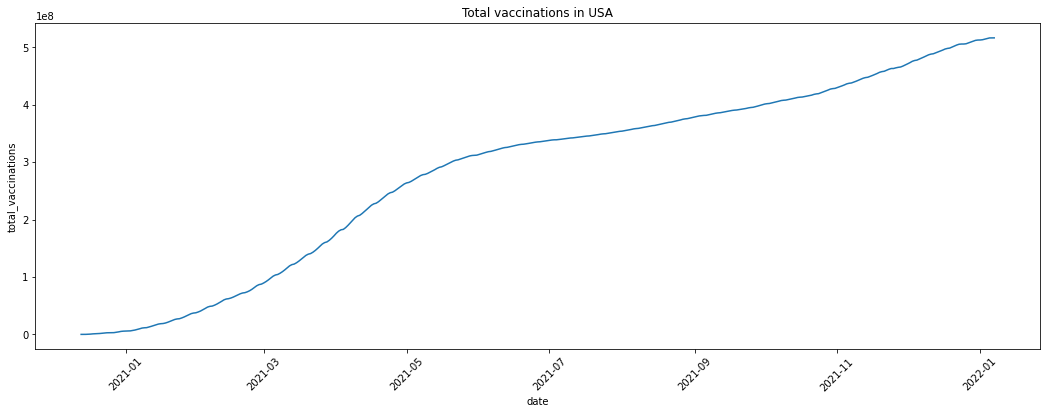

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA, x="date", y="total_vaccinations")                        ##plotting as function date -- ttotal vaccination
plt.title("Total vaccinations in USA")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in USA')

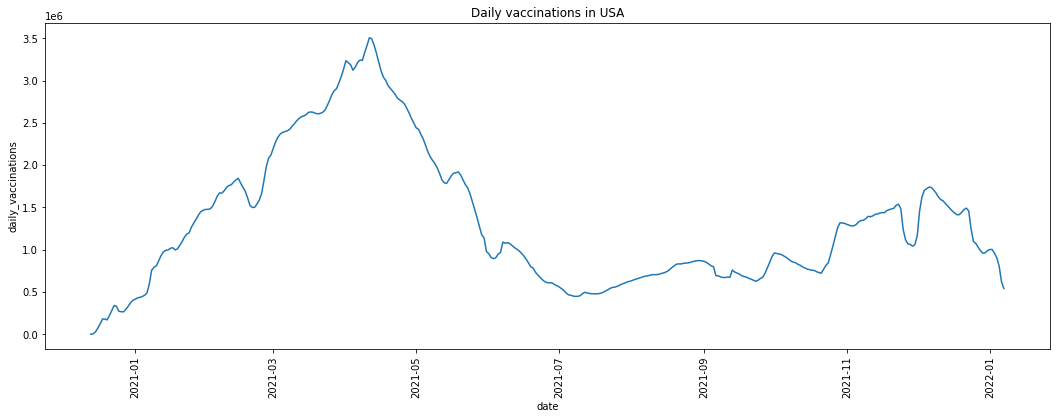

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA, x="date", y="daily_vaccinations")                  ##daily vaccination

plt.xticks(rotation=90)
plt.title("Daily vaccinations in USA")

In [ ]:
vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
vacc_by_country = vacc_by_country.iloc[:10]
vacc_by_country                                                                           ##this is only for per 100 people of the population from every country

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-01-07,2.887772e+09,1.259967e+09,22424286.0,199.95,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2022-01-07,1.505592e+09,8.796251e+08,10037995.0,108.05,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2022-01-07,5.165970e+08,2.460503e+08,3506808.0,155.60,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2022-01-05,3.336279e+08,1.664758e+08,1941268.0,155.91,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2022-01-06,2.849345e+08,1.688196e+08,1916340.0,103.10,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
Japan,JPN,2022-01-03,2.012595e+08,1.011997e+08,1997542.0,159.67,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Pakistan,PAK,2022-01-07,1.621159e+08,9.945427e+07,1394785.0,71.99,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Vietnam,VNM,2022-01-06,1.577406e+08,7.814668e+07,1675471.0,160.68,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Germany,DEU,2022-01-06,1.524961e+08,6.193050e+07,1115149.0,181.76,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


In [ ]:
vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)           ##top 20
vacc_by_country = vacc_by_country.iloc[:20]                                                      
vacc_by_country     

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-01-07,2.887772e+09,1.259967e+09,22424286.0,199.95,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2022-01-07,1.505592e+09,8.796251e+08,10037995.0,108.05,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2022-01-07,5.165970e+08,2.460503e+08,3506808.0,155.60,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2022-01-05,3.336279e+08,1.664758e+08,1941268.0,155.91,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2022-01-06,2.849345e+08,1.688196e+08,1916340.0,103.10,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
Japan,JPN,2022-01-03,2.012595e+08,1.011997e+08,1997542.0,159.67,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Pakistan,PAK,2022-01-07,1.621159e+08,9.945427e+07,1394785.0,71.99,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Vietnam,VNM,2022-01-06,1.577406e+08,7.814668e+07,1675471.0,160.68,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Germany,DEU,2022-01-06,1.524961e+08,6.193050e+07,1115149.0,181.76,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


In [ ]:
# sort by total vaccinations per 100
vacc_by_country = vacc_by_country.sort_values('total_vaccinations_per_hundred', ascending=False)
vacc_by_country

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
South Korea,KOR,2022-01-06,1.057029e+08,4.431371e+07,879783.0,206.03,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
China,CHN,2022-01-07,2.887772e+09,1.259967e+09,22424286.0,199.95,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
England,OWID_ENG,2022-01-06,1.129571e+08,4.360980e+07,831591.0,199.75,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
United Kingdom,GBR,2022-01-06,1.345635e+08,5.189729e+07,970350.0,197.29,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Italy,ITA,2022-01-07,1.145036e+08,4.871447e+07,592833.0,189.68,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
France,FRA,2022-01-06,1.267364e+08,5.306960e+07,734066.0,187.97,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Germany,DEU,2022-01-06,1.524961e+08,6.193050e+07,1115149.0,181.76,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Vietnam,VNM,2022-01-06,1.577406e+08,7.814668e+07,1675471.0,160.68,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Japan,JPN,2022-01-03,2.012595e+08,1.011997e+08,1997542.0,159.67,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"


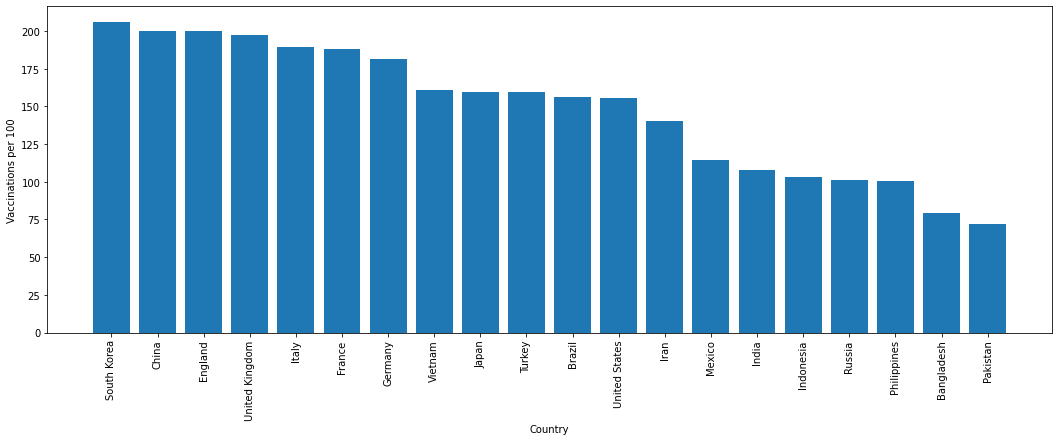

In [ ]:
plt.figure(figsize=(18, 6))
plt.bar(vacc_by_country.index, vacc_by_country.total_vaccinations_per_hundred)

plt.xticks(rotation = 90)
plt.ylabel('Vaccinations per 100')
plt.xlabel('Country')
plt.show()

In [ ]:
total_vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
total_vacc_by_country = total_vacc_by_country.iloc[:10]
total_vacc_by_country

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-01-07,2.887772e+09,1.259967e+09,22424286.0,199.95,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2022-01-07,1.505592e+09,8.796251e+08,10037995.0,108.05,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2022-01-07,5.165970e+08,2.460503e+08,3506808.0,155.60,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2022-01-05,3.336279e+08,1.664758e+08,1941268.0,155.91,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2022-01-06,2.849345e+08,1.688196e+08,1916340.0,103.10,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
Japan,JPN,2022-01-03,2.012595e+08,1.011997e+08,1997542.0,159.67,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Pakistan,PAK,2022-01-07,1.621159e+08,9.945427e+07,1394785.0,71.99,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Vietnam,VNM,2022-01-06,1.577406e+08,7.814668e+07,1675471.0,160.68,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Germany,DEU,2022-01-06,1.524961e+08,6.193050e+07,1115149.0,181.76,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


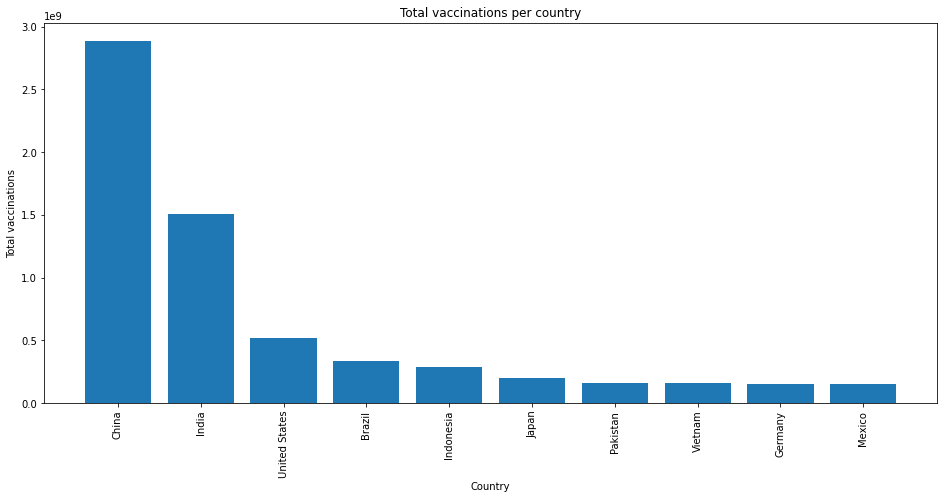

In [ ]:
plt.figure(figsize=(16, 7))
plt.bar(total_vacc_by_country.index, total_vacc_by_country.total_vaccinations)

plt.title('Total vaccinations per country')
plt.xticks(rotation = 90)
plt.ylabel('Total vaccinations')
plt.xlabel('Country')
plt.show()

In [ ]:
vacc_names_by_country = df.groupby('vaccines').max().sort_values('total_vaccinations', ascending=False)
vacc_names_by_country.head()                        ##vaccine types

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
vaccines,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2022-01-07,2.887772e+09,1.259967e+09,22424286.0,199.95
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-01-07,1.505592e+09,8.796251e+08,10037995.0,108.05
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-01-07,5.165970e+08,2.460503e+08,3506808.0,214.20
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2022-01-05,3.336279e+08,1.664758e+08,1941268.0,155.91
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2022-01-06,2.849345e+08,1.688196e+08,1916340.0,103.10


In [ ]:
vacc_names_by_country = vacc_names_by_country.iloc[:10]
vacc_names_by_country

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
vaccines,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2022-01-07,2.887772e+09,1.259967e+09,22424286.0,199.95
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-01-07,1.505592e+09,8.796251e+08,10037995.0,108.05
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-01-07,5.165970e+08,2.460503e+08,3506808.0,214.20
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2022-01-05,3.336279e+08,1.664758e+08,1941268.0,155.91
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2022-01-06,2.849345e+08,1.688196e+08,1916340.0,103.10
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2022-01-07,2.012595e+08,1.011997e+08,1997542.0,225.28
"CanSino, Covaxin, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik V",Pakistan,PAK,2022-01-07,1.621159e+08,9.945427e+07,1394785.0,71.99
"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",Vietnam,VNM,2022-01-06,1.577406e+08,7.814668e+07,1675471.0,160.68
"Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Spain,SVN,2022-01-07,1.524961e+08,6.193050e+07,1115149.0,214.42


In [ ]:
vacc_names_by_country=vacc_names_by_country.reset_index()
vacc_names_by_country

,vaccines,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,CHN,2022-01-07,2.887772e+09,1.259967e+09,22424286.0,199.95
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-01-07,1.505592e+09,8.796251e+08,10037995.0,108.05
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-01-07,5.165970e+08,2.460503e+08,3506808.0,214.20
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,BRA,2022-01-05,3.336279e+08,1.664758e+08,1941268.0,155.91
4,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Indonesia,IDN,2022-01-06,2.849345e+08,1.688196e+08,1916340.0,103.10
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2022-01-07,2.012595e+08,1.011997e+08,1997542.0,225.28
6,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...",Pakistan,PAK,2022-01-07,1.621159e+08,9.945427e+07,1394785.0,71.99
7,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",Vietnam,VNM,2022-01-06,1.577406e+08,7.814668e+07,1675471.0,160.68
8,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Spain,SVN,2022-01-07,1.524961e+08,6.193050e+07,1115149.0,214.42
9,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,MEX,2022-01-01,1.489385e+08,8.191635e+07,1648223.0,114.34


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

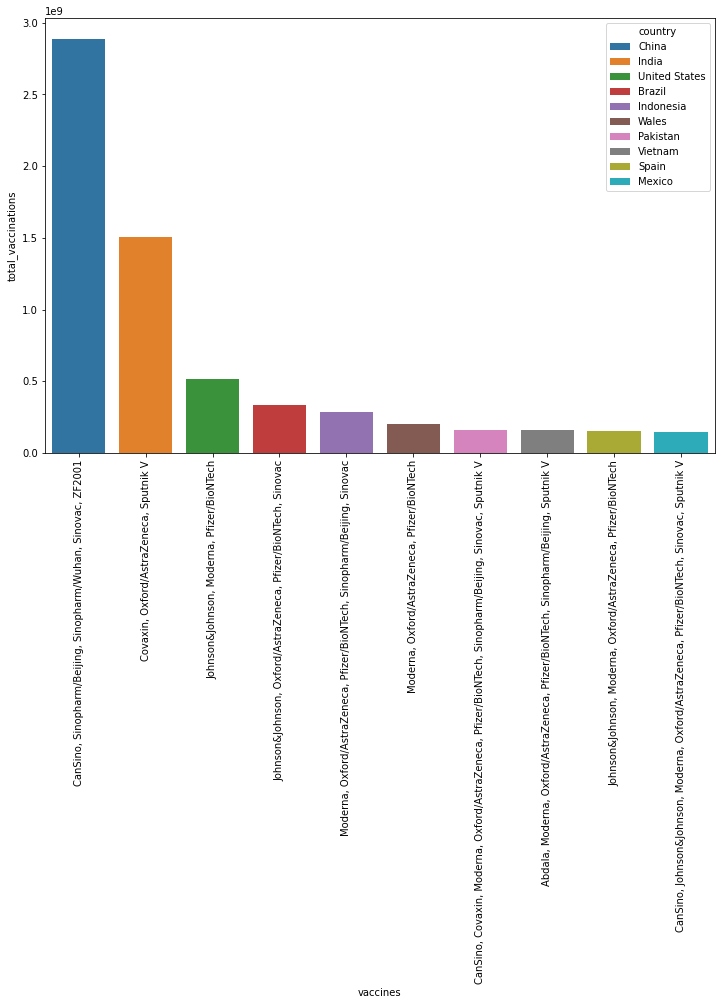

In [ ]:
plt.figure(figsize=(12,8))

sns.barplot(data = vacc_names_by_country, x='vaccines', y = 'total_vaccinations', hue = 'country', dodge=False)
plt.xticks(rotation=90)